<a href="https://colab.research.google.com/github/RomanKunal/PythonLib/blob/main/HandlingMissingData1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("/content/data_science_job.csv")
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [3]:
data.isnull().value_counts()

enrollee_id  city   city_development_index  gender  relevent_experience  enrolled_university  education_level  major_discipline  experience  company_size  company_type  training_hours  target
False        False  False                   False   False                False                False            False             False       False         False         False           False     8434
                                                                                                                                             True          True          False           False     2600
                                            True    False                False                False            False             False       False         False         False           False     2171
                                                                                                                                             True          True          False           False      855
        

In [4]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [6]:
cols=[var for var in data.columns if data[var].isnull().mean()<0.05 and data[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
len(data[cols].dropna())/len(data)


0.8968577095730244

In [12]:
data['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [13]:
data[cols].shape

(19158, 5)

In [14]:
new_data=data[cols].dropna()
new_data.shape

(17182, 5)

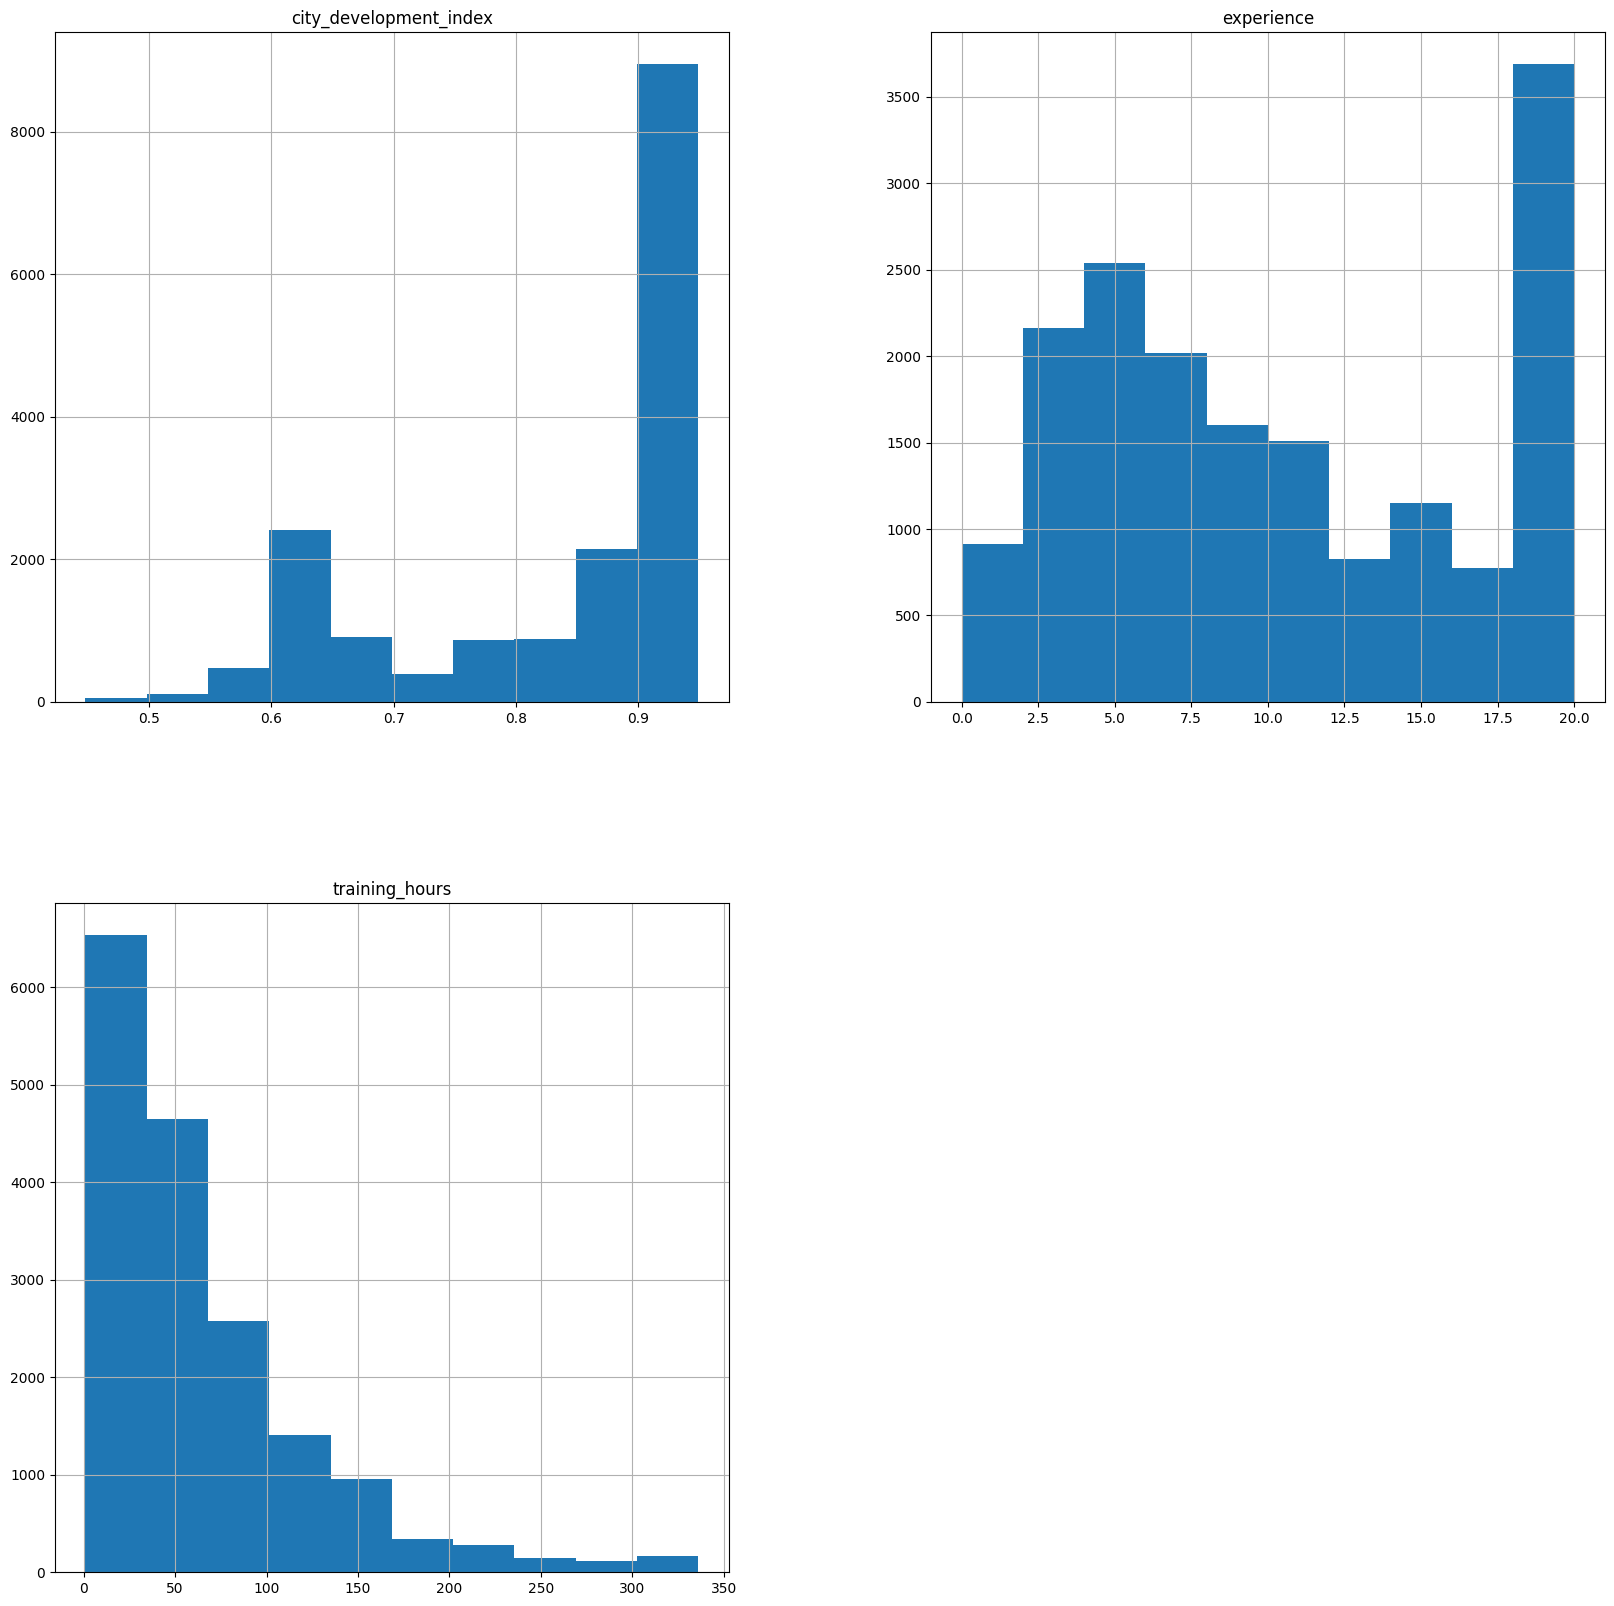

In [15]:
new_data.hist(figsize=(20,20))
plt.show()

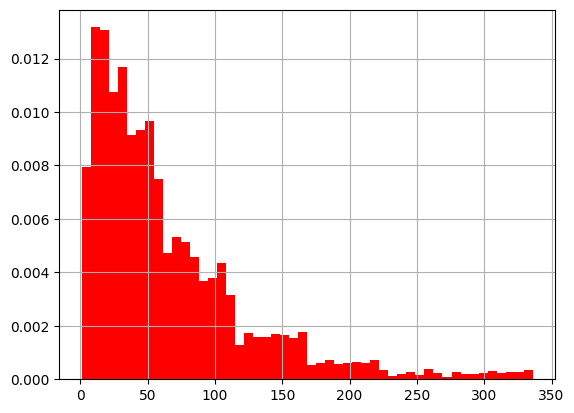

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['training_hours'].hist(bins=50, ax=ax, density=True, color='red')
plt.show()

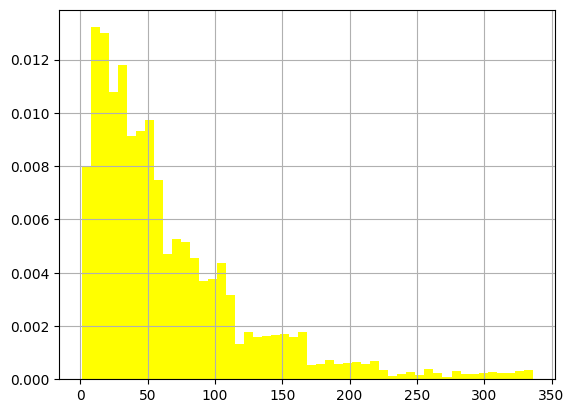

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
new_data['training_hours'].hist(bins=50, ax=ax, density=True, color='yellow')
plt.show()

**For categorical column**

In [21]:
temp=pd.concat(
    [
        data['education_level'].value_counts()/len(data),
        new_data['education_level'].value_counts()/len(new_data)
    ],
    axis=1

)
temp.columns=['old_data','new_data']
temp

,old_data,new_data
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [24]:
temp=pd.concat(
    [
        data['enrolled_university'].value_counts()/len(data),
        new_data['enrolled_university'].value_counts()/len(new_data)
    ],
    axis=1
)
temp.columns=["old_data","new_data1"]
temp

,old_data,new_data1
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079
